In [8]:
#load liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [13]:
pima=pd.read_csv('pima.csv',names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Bmi','DiabetesPedigreeFunction','Age','Class'])
pima
df=pd.DataFrame(data=pima)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Bmi,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
Bmi                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [15]:
df.shape

(768, 9)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Bmi,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
Bmi                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
Bmi                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

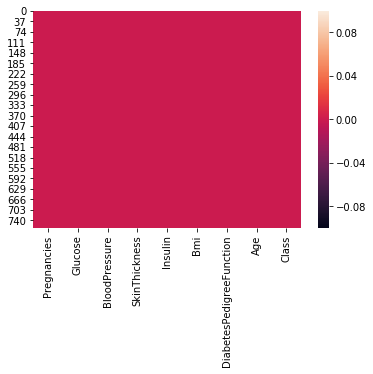

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Bmi', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

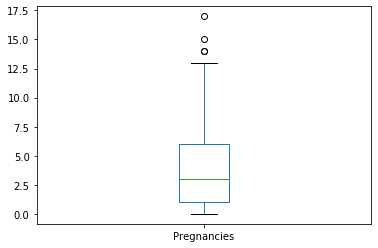

In [21]:
df['Pregnancies'].plot.box()

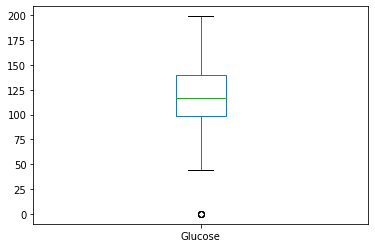

In [22]:
df['Glucose'].plot.box()

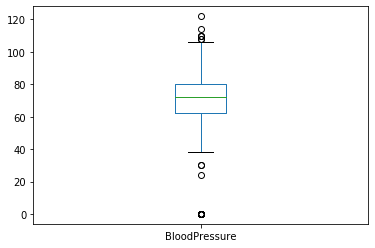

In [21]:
df['BloodPressure'].plot.box()

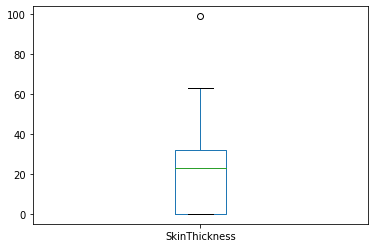

In [22]:
df['SkinThickness'].plot.box()

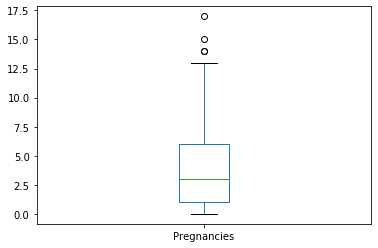

In [23]:
df['Pregnancies'].plot.box()

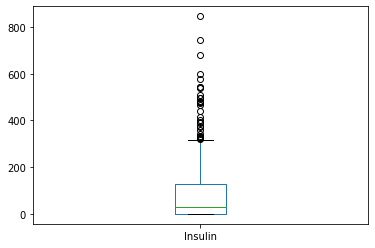

In [24]:
df['Insulin'].plot.box()

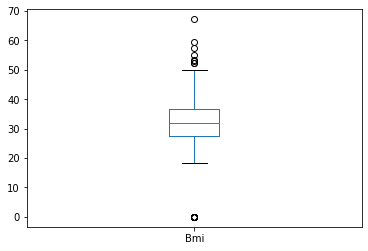

In [25]:
df['Bmi'].plot.box()

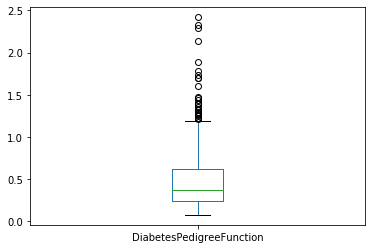

In [26]:
df['DiabetesPedigreeFunction'].plot.box()

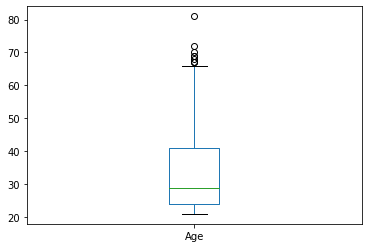

In [27]:
df['Age'].plot.box()

In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [24]:
threshold=3
print(np.where(z>3))
df1=df[(z<3).all(axis=1)]
df1

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int32), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int32))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Bmi,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
14,5,166,72,19,175,25.8,0.587,51,1


In [25]:
df.shape

(768, 9)

In [87]:
df1.shape

(688, 9)

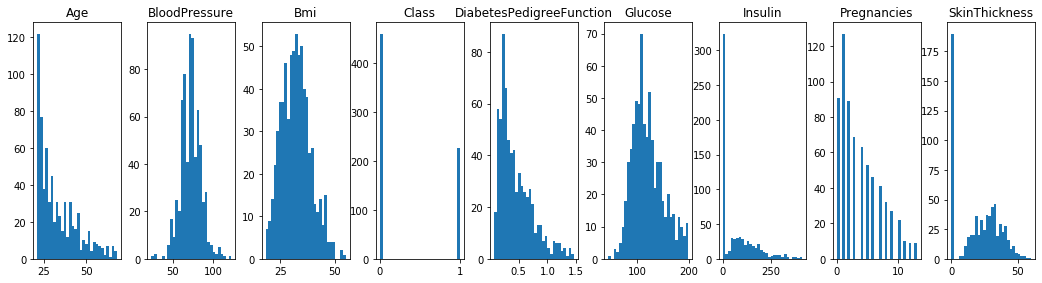

In [89]:
df1.hist(figsize=(20,10), grid = False, layout=(2,10), bins = 30)
plt.show()

In [26]:
from scipy import stats
stats.skew(df)

array([ 0.89991194,  0.17341396, -1.84000523,  0.10915876,  2.26781046,
       -0.42814328,  1.9161592 ,  1.12738926,  0.6337757 ])

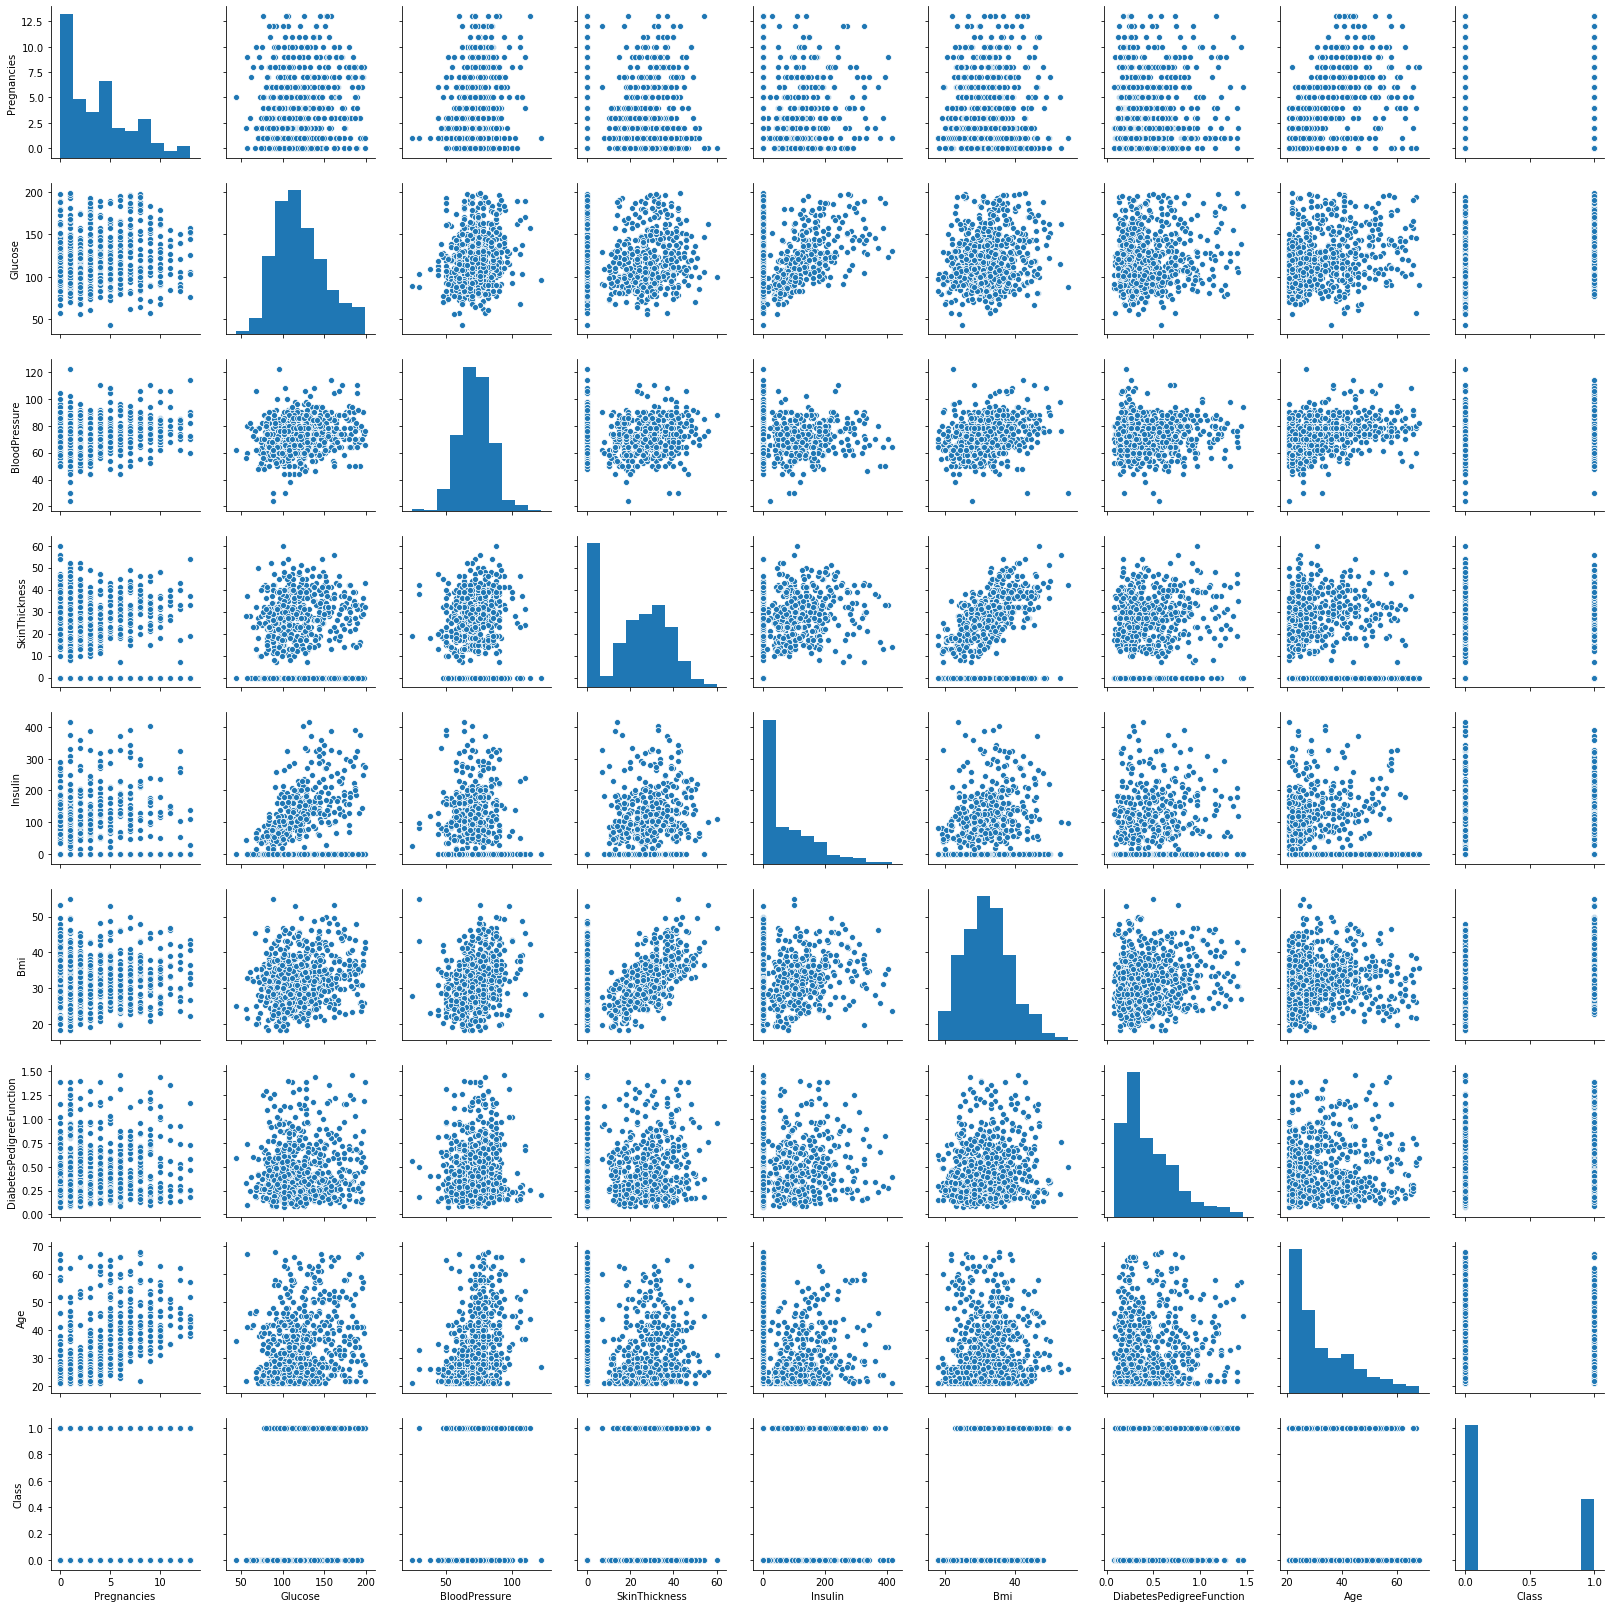

In [27]:
sns.pairplot(data=df1)

In [62]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Bmi', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

# STANDARDIZATION

In [28]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [92]:
x.shape

(688, 8)

In [93]:
y.shape

(688,)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(536, 8)
(152, 8)
(536,)
(152,)


In [32]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7631578947368421
[[87  4]
 [32 29]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        91
           1       0.88      0.48      0.62        61

    accuracy                           0.76       152
   macro avg       0.80      0.72      0.72       152
weighted avg       0.79      0.76      0.74       152



In [33]:
y_test.value_counts()

0    91
1    61
Name: Class, dtype: int64

In [34]:
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.40131578947368424

In [35]:
# calculate the percentage of zeros
1 - y_test.mean()

0.5986842105263157

In [36]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5986842105263157

In [37]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.598684
Name: Class, dtype: float64

In [44]:
# this produces a 2x2 numpy array (matrix)
from sklearn import metrics
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.598684
Name: Class, dtype: float64

In [49]:
# make class predictions for the testing set
y_pred_class = lg.predict(x_test)

In [50]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0]
False: [0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]


In [51]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[87  4]
 [32 29]]


In [52]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0]
Pred [0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]


In [53]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[87  4]
 [32 29]]


In [54]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7631578947368421
0.7631578947368421


In [55]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.23684210526315788
0.23684210526315785


In [56]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.47540983606557374
0.47540983606557374


In [57]:
specificity = TN / (TN + FP)

print(specificity)

0.9560439560439561


In [58]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.04395604395604396
0.04395604395604391


In [59]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.8787878787878788
0.8787878787878788


In [61]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
lg.predict(x_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [62]:
# print the first 10 predicted probabilities of class membership
lg.predict_proba(x_test)[0:10]

array([[0.62006545, 0.37993455],
       [0.80178186, 0.19821814],
       [0.75731201, 0.24268799],
       [0.80961138, 0.19038862],
       [0.21385242, 0.78614758],
       [0.33365543, 0.66634457],
       [0.71678472, 0.28321528],
       [0.81090648, 0.18909352],
       [0.81227732, 0.18772268],
       [0.87679498, 0.12320502]])

In [63]:
# print the first 10 predicted probabilities for class 1
lg.predict_proba(x_test)[0:10, 1]

array([0.37993455, 0.19821814, 0.24268799, 0.19038862, 0.78614758,
       0.66634457, 0.28321528, 0.18909352, 0.18772268, 0.12320502])

In [65]:
# store the predicted probabilities for class 1
y_pred_prob = lg.predict_proba(x_test)[:, 1]

In [66]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

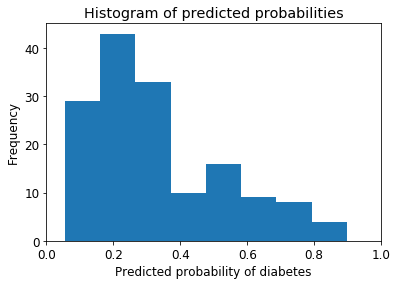

In [67]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [76]:
y_pred_class=y_pred_class.reshape(-1,1)

In [81]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.37993455, 0.19821814, 0.24268799, 0.19038862, 0.78614758,
       0.66634457, 0.28321528, 0.18909352, 0.18772268, 0.12320502])

In [82]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [83]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)


[[87  4]
 [32 29]]


In [84]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [85]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


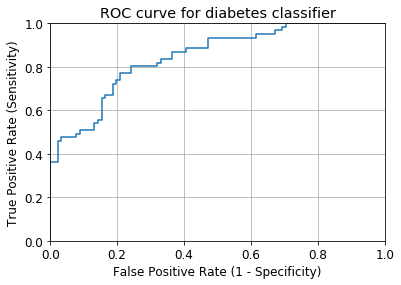

In [86]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [87]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8465141415961088
